## Machine Failure Prediction

##### Objectives:
  The goal of this project is to predict machine failures based on sensor readings and operational settings. Predicting potential failures in advance helps reduce maintenance costs,downtime and improves overall production efficiency.

##### Project Details:
   Manufacturing machines often fail suddenly, leading to unplanned downtime,high repair cost and production loss.
   Using real-time sensor data such as temperature, torque, rotational speed, we build a classification model that predicts whether a  machine is likely to fail soon.

#### Step 1 : Data gathering

In [1]:
# Ignore warnings to keep output clean
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# Import essential libraries
import pandas as pd

# To clean the data and preprocess it
#from data_clean_preprocess import clean_process_data



In [3]:
# Load dataset
path = r"E:\data science\datasets\ML\Machine failure\train.csv"
df = pd.read_csv(path)

In [4]:
print("✅ Dataset Loaded Successfully!")
df.head()

✅ Dataset Loaded Successfully!


,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


### Step 2 :Basic data quality check

#### Data exploration

In [5]:
print("Shape of the dataset:")
print(df.shape)

Shape of the dataset:
(136429, 14)


In [6]:
print("Columns of the dataset:")
print(df.columns)

Columns of the dataset:
Index(['id', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')


In [7]:
print("Describe of the dataset:")
print(df.describe())

Describe of the dataset:
                  id  Air temperature [K]  Process temperature [K]  \
count  136429.000000        136429.000000            136429.000000   
mean    68214.000000           299.862776               309.941070   
std     39383.804275             1.862247                 1.385173   
min         0.000000           295.300000               305.800000   
25%     34107.000000           298.300000               308.700000   
50%     68214.000000           300.000000               310.000000   
75%    102321.000000           301.200000               310.900000   
max    136428.000000           304.400000               313.800000   

       Rotational speed [rpm]    Torque [Nm]  Tool wear [min]  \
count           136429.000000  136429.000000    136429.000000   
mean              1520.331110      40.348643       104.408901   
std                138.736632       8.502229        63.965040   
min               1181.000000       3.800000         0.000000   
25%               1

In [8]:
print("Info of the dataset:")
print(df.info())

Info of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-nu

In [9]:
# Removes the unncessory columns:
df.drop(columns=['id',],inplace=True)

In [10]:
df['Machine failure'].unique()

array([0, 1])

In [11]:
df['Machine failure'].value_counts()

Machine failure
0    134281
1      2148
Name: count, dtype: int64

<Axes: xlabel='Machine failure'>

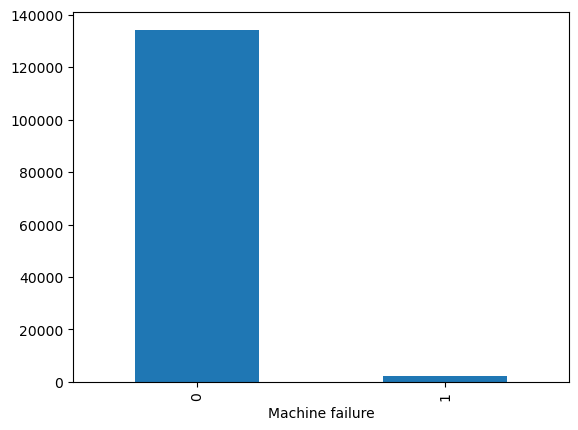

In [12]:
df['Machine failure'].value_counts().plot(kind='bar')

In [13]:
df['Type'].unique()

array(['L', 'M', 'H'], dtype=object)

In [14]:
df.head()

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


#### From above we will see that 'Product ID' not properly numerical type so we will removes the letters from it and we will convert to integer.

In [15]:
# Removes unique letter of the Product ID:
df['Product ID'] = df['Product ID'].str.strip('L')
df['Product ID'] = df['Product ID'].str.strip('M')
df['Product ID'] = df['Product ID'].str.strip('H')

##### After checking info Product ID is of object data type so we will convert to numerical data type.

In [16]:
df['Product ID'] = df['Product ID'].astype(int)
df['Product ID']

0         50096
1         20343
2         49454
3         53355
4         24050
          ...  
136424    22284
136425    38017
136426    54690
136427    53876
136428    47937
Name: Product ID, Length: 136429, dtype: int64

In [17]:
# Checking info after converting data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Product ID               136429 non-null  int64  
 1   Type                     136429 non-null  object 
 2   Air temperature [K]      136429 non-null  float64
 3   Process temperature [K]  136429 non-null  float64
 4   Rotational speed [rpm]   136429 non-null  int64  
 5   Torque [Nm]              136429 non-null  float64
 6   Tool wear [min]          136429 non-null  int64  
 7   Machine failure          136429 non-null  int64  
 8   TWF                      136429 non-null  int64  
 9   HDF                      136429 non-null  int64  
 10  PWF                      136429 non-null  int64  
 11  OSF                      136429 non-null  int64  
 12  RNF                      136429 non-null  int64  
dtypes: float64(3), int64(9), object(1)
memory usage: 13.5+ MB


In [18]:
# Checking for missing values:
print("Missing values:")
print(df.isnull().sum())

Missing values:
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64


#### There is no any missing values in dataset.

In [19]:
# Checking duplicates:
print("Duplicates of the dataset:")
print(df.duplicated().sum())

Duplicates of the dataset:
1134


#### There is duplicates present in dataset so we will drop the duplicates.

In [20]:
df = df.drop_duplicates()

In [21]:
# After dropping duplicates we will check and confirm it
print("Duplicates of the dataset:")
print(df.duplicated().sum())

Duplicates of the dataset:
0


In [22]:
import numpy as np

In [23]:
# New feature
df['Power'] = (2 * np.pi * df['Torque [Nm]'] * df['Rotational speed [rpm]']) / (60 * 1000)

In [24]:
df.columns

Index(['Product ID', 'Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF', 'Power'],
      dtype='object')

### Step 3 : Seperte X and Y features:
    Y : Target feature : Machine failure
    X : All remaining features

In [25]:
X = df.drop(columns=['Machine failure']) # Drop target column → Independent features
Y = df[['Machine failure']] # Target variable

In [26]:
print("\n🔹 Independent Features (X):")
display(X.head())


🔹 Independent Features (X):


,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,Power
0,50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,6.033492
1,20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,5.360280
2,49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,5.009008
3,53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,7.069966
4,24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,6.083317


In [27]:
print("\n🔸 Target Variable (Y):")
display(Y.head())


🔸 Target Variable (Y):


,Machine failure
0,0
1,0
2,0
3,0
4,0


### STep 4: Data processing and Data cleaning

In [28]:
# Import required libraries for this process:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [29]:
# Seperate categorical and continuous features for encoding and scaling data
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [30]:
num_pipe = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler()
)

In [31]:
cat_pipe = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore',sparse_output=False)
)

In [32]:
pre = ColumnTransformer([
    ('cat',cat_pipe,cat),
    ('con',num_pipe,con)
]).set_output(transform='pandas')

In [33]:
pre

ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Type']),
                                ('con',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Product ID', 'Air temperature [K]',
                                  'Process temperature [K]',
                                  'Rotational speed [rpm]', 'Torque [Nm]',
                                  'Tool wear [min]', 'TWF', 'HDF', 'PWF', 'OSF',
                                  'RNF', 'Power'])])

In [34]:
X_pre = pre.fit_transform(X)
X_pre.head()

,cat__Type_H,cat__Type_L,cat__Type_M,con__Product ID,con__Air temperature [K],con__Process temperature [K],con__Rotational speed [rpm],con__Torque [Nm],con__Tool wear [min],con__TWF,con__HDF,con__PWF,con__OSF,con__RNF,con__Power
0,0.0,1.0,0.0,0.455430,0.395634,-0.246272,0.545724,-0.499466,0.557269,-0.03924,-0.072168,-0.048691,-0.06289,-0.047611,-0.294023
1,0.0,0.0,1.0,-1.649926,1.469374,1.558865,1.721407,-1.323713,1.495570,-0.03924,-0.072168,-0.048691,-0.06289,-0.047611,-0.968984
2,0.0,1.0,0.0,0.410001,-0.302297,-1.040532,2.053195,-1.629862,-1.241141,-0.03924,-0.072168,-0.048691,-0.06289,-0.047611,-1.321169
3,0.0,1.0,0.0,0.686040,0.610382,0.692399,0.026404,0.466080,1.448655,-0.03924,-0.072168,-0.048691,-0.06289,-0.047611,0.745146
4,0.0,0.0,1.0,-1.387614,-1.000229,-0.679505,0.870299,-0.581891,-1.100396,-0.03924,-0.072168,-0.048691,-0.06289,-0.047611,-0.244067


In [35]:
new_cols = []
for i in X_pre.columns:
    c = i.split('__')[-1]
    new_cols.append(c)
print(new_cols)

['Type_H', 'Type_L', 'Type_M', 'Product ID', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF', 'Power']


In [36]:
X_pre.columns = new_cols
X_pre.head()

,Type_H,Type_L,Type_M,Product ID,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,Power
0,0.0,1.0,0.0,0.455430,0.395634,-0.246272,0.545724,-0.499466,0.557269,-0.03924,-0.072168,-0.048691,-0.06289,-0.047611,-0.294023
1,0.0,0.0,1.0,-1.649926,1.469374,1.558865,1.721407,-1.323713,1.495570,-0.03924,-0.072168,-0.048691,-0.06289,-0.047611,-0.968984
2,0.0,1.0,0.0,0.410001,-0.302297,-1.040532,2.053195,-1.629862,-1.241141,-0.03924,-0.072168,-0.048691,-0.06289,-0.047611,-1.321169
3,0.0,1.0,0.0,0.686040,0.610382,0.692399,0.026404,0.466080,1.448655,-0.03924,-0.072168,-0.048691,-0.06289,-0.047611,0.745146
4,0.0,0.0,1.0,-1.387614,-1.000229,-0.679505,0.870299,-0.581891,-1.100396,-0.03924,-0.072168,-0.048691,-0.06289,-0.047611,-0.244067


#### Exploratory Data Analysis (EDA)

In [37]:
# Import essential libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
df.columns

Index(['Product ID', 'Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF', 'Power'],
      dtype='object')

In [39]:
num_features = ["Air temperature [K]","Process temperature [K]","Rotational speed [rpm]","Torque [Nm]", "Tool wear [min]"]


Plotting Histograms:


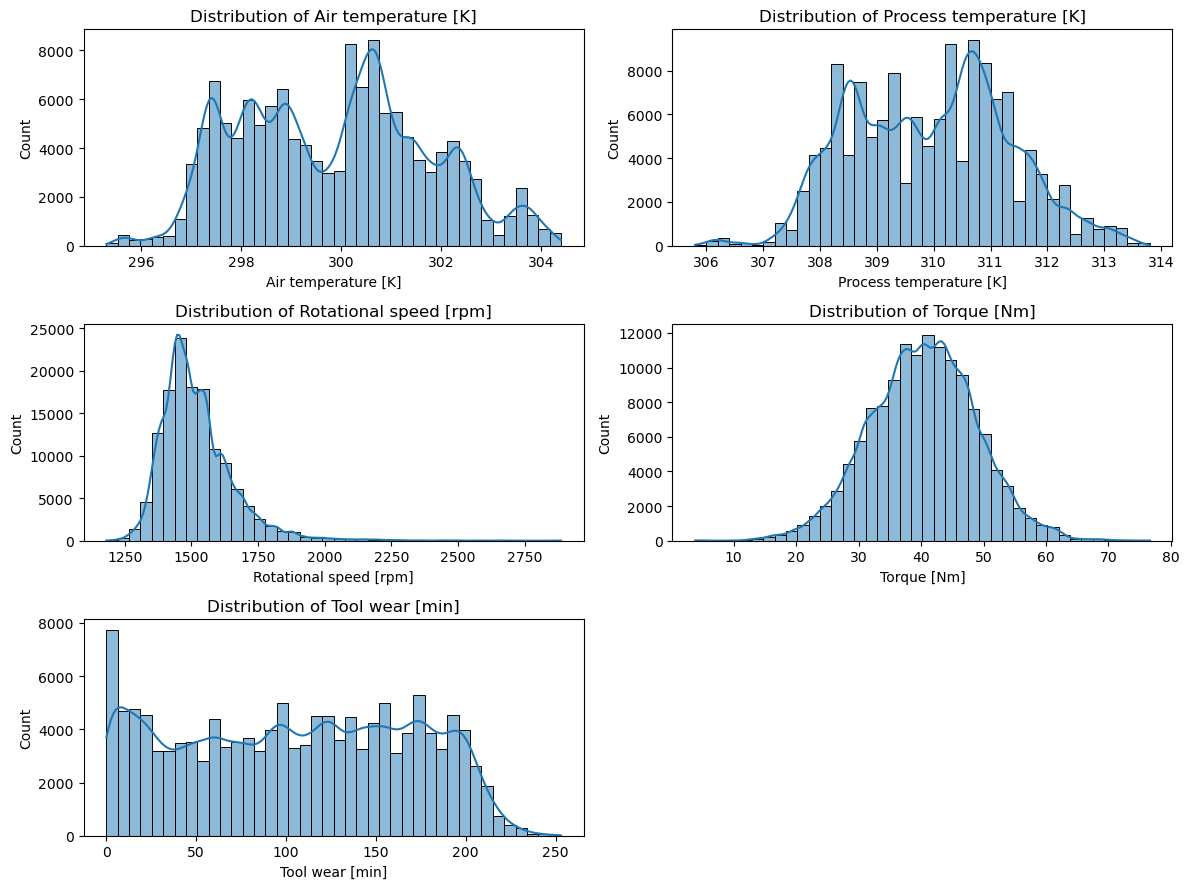

In [40]:
print("\nPlotting Histograms:")

import math

n = len(num_features)
rows = math.ceil(n / 2)

plt.figure(figsize=(12, rows*3))
for i, col in enumerate(num_features, 1):
    plt.subplot(rows, 2, i)
    sns.histplot(df[col], bins=40, kde=True)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

* The histograms show how each numerical feature is distributed in the dataset. They help us understand the shape of the data—whether the values are normally distributed, skewed, or contain multiple peaks. The KDE curve makes it easy to see patterns and trends in sensor readings such as torque, temperature, and rotational speed.


Plotting Boxplots:


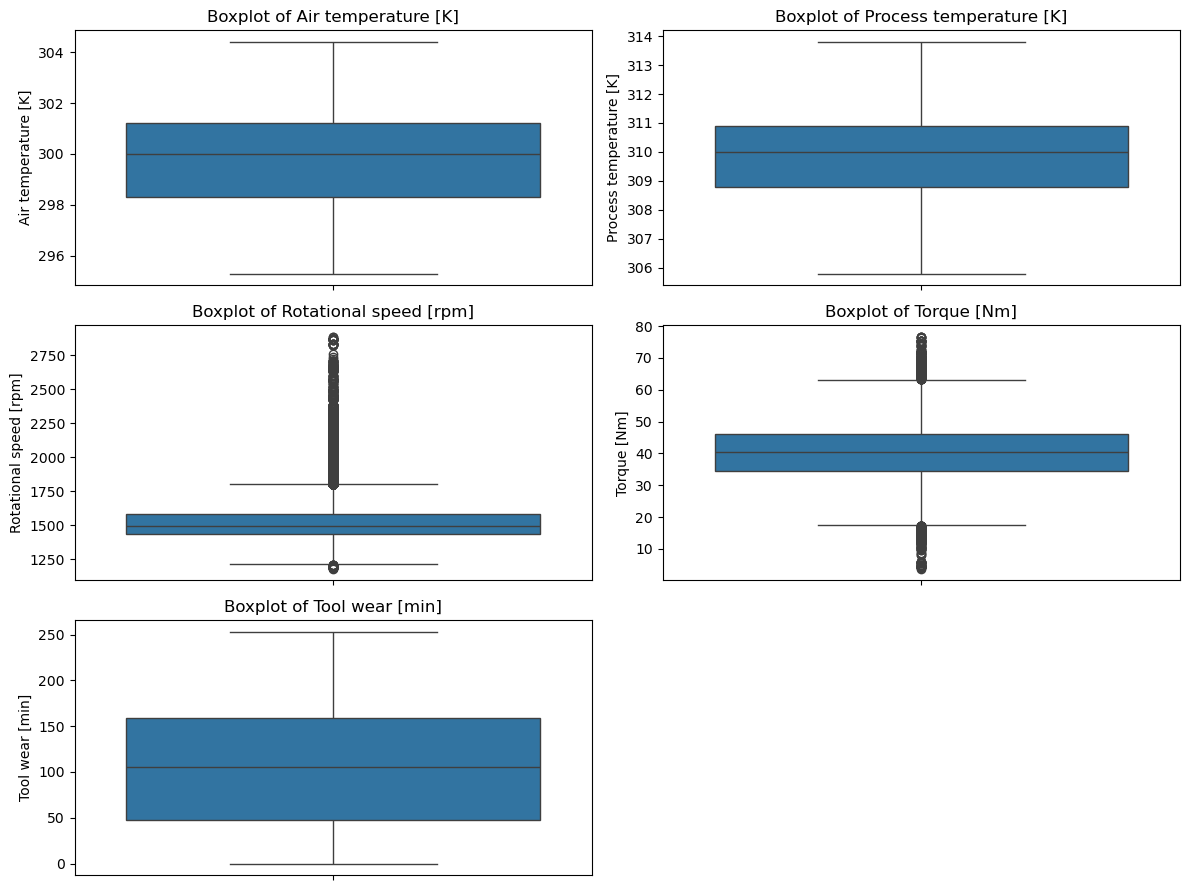

In [41]:
print("\nPlotting Boxplots:")

plt.figure(figsize=(12, rows*3))

for i, col in enumerate(num_features, 1):
    plt.subplot(rows, 2, i)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

* The boxplots show the distribution and spread of each numerical feature in the dataset. They help us identify outliers, understand the range of values, and check whether any sensor readings (like torque, temperature, or tool wear) have extreme values.
* Overall, the boxplots highlight which features have high variability and which contain unusual values that may affect machine performance or model accuracy.


 Pairplot:


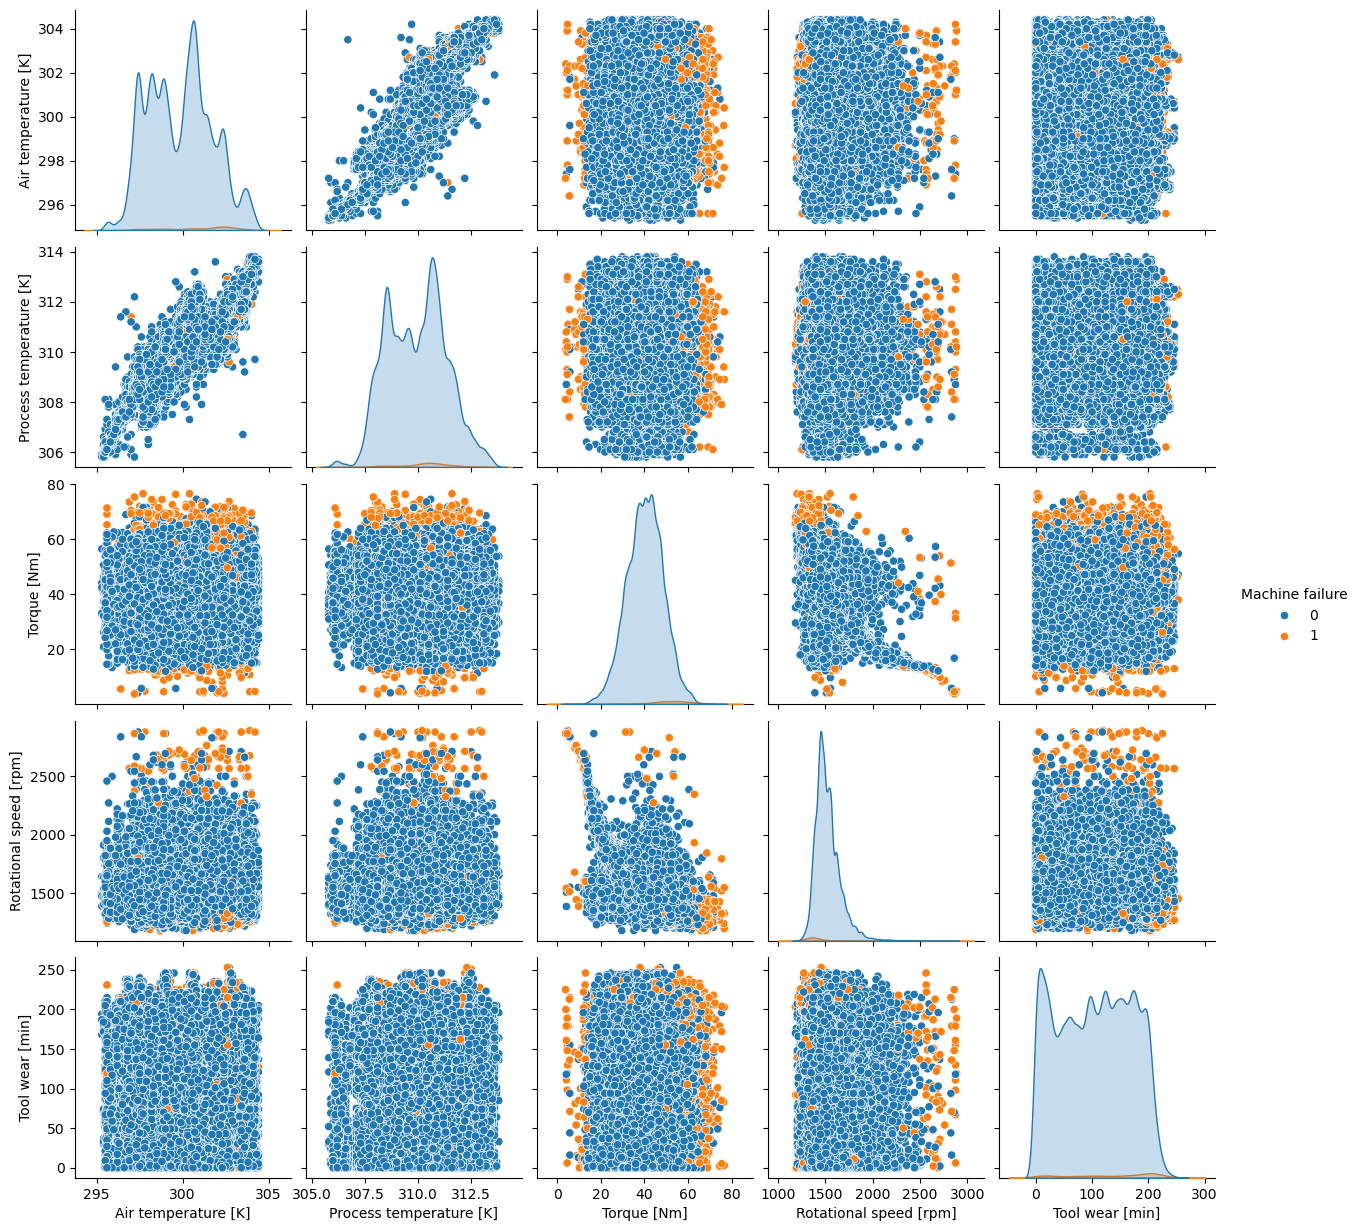

In [42]:
print("\n Pairplot:")
imp_features = ["Air temperature [K]", "Process temperature [K]",
                      "Torque [Nm]", "Rotational speed [rpm]", "Tool wear [min]", "Machine failure"]

sns.pairplot(df[imp_features], hue="Machine failure", diag_kind="kde")
plt.show()

From pairplots:
* The visual analysis (pairplot) shows that machines that broke down generally had greater twisting force (torque), more worn out tools, and were a bit warmer than the ones that kept running.


 Compairing failed v/s non-failed machine reading:


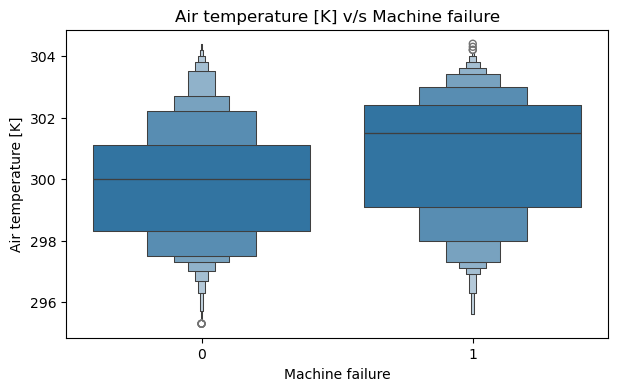

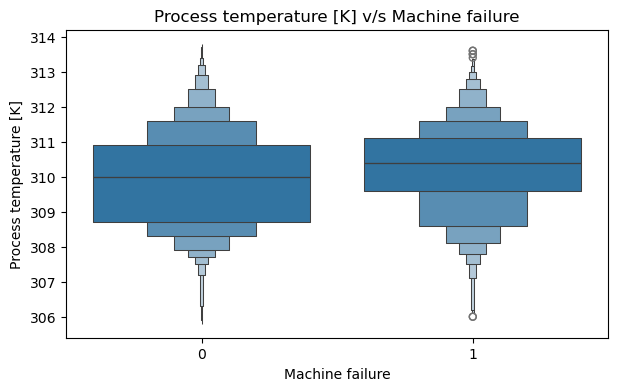

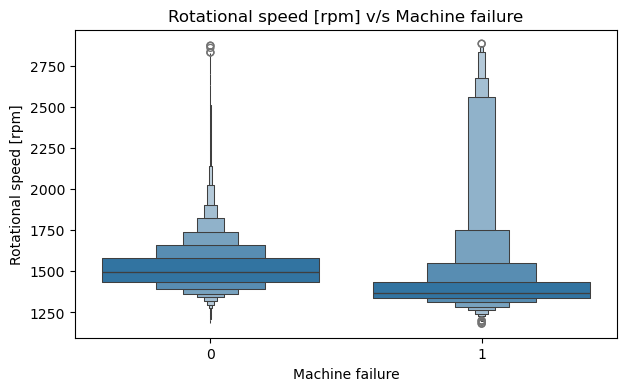

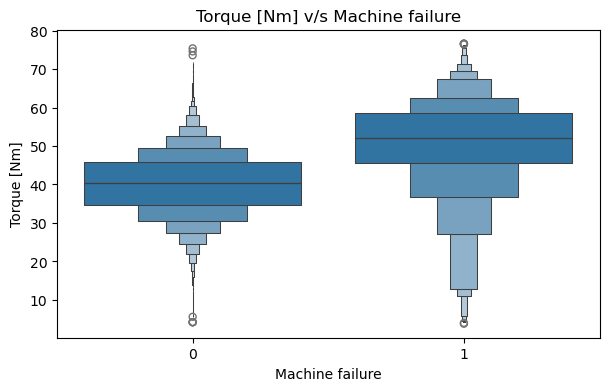

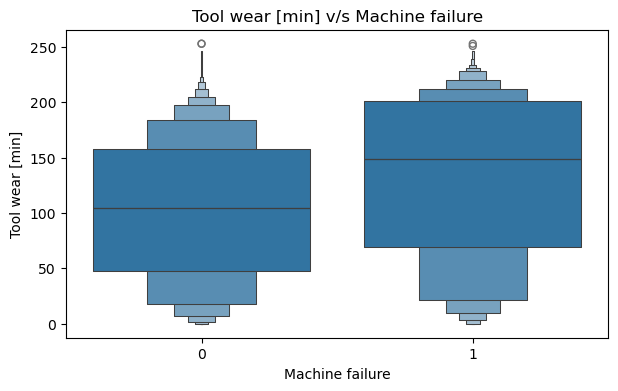

In [43]:
print("\n Compairing failed v/s non-failed machine reading:")

for col in num_features:
    plt.figure(figsize=(7,4))
    sns.boxenplot(data=df,x="Machine failure",y=col)
    plt.title(f"{col} v/s Machine failure")
    plt.show()

For each numerical feature, the boxplot shows two boxes:
* 0 : Machine did NOT fail
* 1 : Machine FAILED

We compare the sensor values for both groups.

* This boxplots help us to compare how each sensor behaves for failed and non failed machines.
* For each failure like temperature,torque,tool wear, and speed we look at how the distributions differ.
* If the box failed machines is higher, it means that higher values of theat sensor increase the chance of failure.
* If torque and tool wear are significantly higher for failed machines, these becomes important contributors to breakdown.
* This visual analysis help us identify the most influential features before building our predictions model.

1) Air temperature [K] or Process temperature [K]:
 * A slight temperature can be sign of a machine failure.
 * Failures are caused by thermal stress.

2) Rotational speed [rpm]:
 * Failed machines speed will be reduced.
 * Reduced speed indicates mechanical problem.

3) Torque [Nm]:
 * The higher torque indicates machines have a heavy mechanical load.
 * So higher torque often failure of machine.

4) Tool wear [min]:
 * Wearing of tools indicates the more chances of machine failure.
 * Old tools cause machine failure.


### Step 5 : Train_Test_split
 Dividing dataset into 75% trainig and 25% testing

In [44]:
# Import train_test_split libraries
from sklearn.model_selection import train_test_split,cross_val_score

In [45]:
xtrain, xtest, ytrain, ytest = train_test_split(X_pre,Y,train_size=0.75,test_size=0.25,random_state=21)

In [46]:
xtrain.shape

(101471, 15)

In [47]:
xtest.shape

(33824, 15)

In [48]:
ytrain.shape

(101471, 1)

In [49]:
ytest.shape

(33824, 1)

### Oversampling technique using smote

In [50]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


### Imbalance data before SMOTE

In [51]:
ytrain['Machine failure'].value_counts()

Machine failure
0    99872
1     1599
Name: count, dtype: int64

In [52]:
from imblearn.over_sampling import SMOTE

In [53]:
smote = SMOTE()

In [54]:
x_sampl, y_sampl = smote.fit_resample(xtrain,ytrain)

### After smote

In [55]:
y_sampl['Machine failure'].value_counts()

Machine failure
0    99872
1    99872
Name: count, dtype: int64

### Step 6 : Building Model

#### 6.1 : Logistic regression

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
model1 = LogisticRegression(class_weight='balanced')
model1.fit(xtrain,ytrain)

LogisticRegression(class_weight='balanced')

## Algorithm Evaluation

In [58]:
# Model building=> Decision Tree, Logistic Regression, Random Forest, Gradient Boost, XGBoost
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

# Evaluation metrics
from sklearn.metrics import f1_score,ConfusionMatrixDisplay,classification_report,accuracy_score,roc_auc_score,RocCurveDisplay

In [59]:
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    XGBClassifier(),
    GaussianNB()
]

In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [61]:
def evaluate_model(model,x_sampl,y_sampl,xtest,ytest):

    model.fit(x_sampl,y_sampl)

    ypred_train = model.predict(x_sampl)
    ypred_test = model.predict(xtest)
    
    
    y_sampl_proba = model.predict_proba(x_sampl)[:,1]
    y_test_proba = model.predict_proba(xtest)[:,1]

    # Metrics
    f1_train = f1_score(y_sampl, ypred_train)
    f1_test = f1_score(ytest, ypred_test)

    roc_auc_train = roc_auc_score(y_sampl, y_sampl_proba)
    roc_auc_test = roc_auc_score(ytest,y_test_proba)
    

    # Cross- validation on SMOTE -balanced data
    scores = cross_val_score(model,x_sampl,y_sampl, cv=4, scoring='f1_macro')
    f1_cv = scores.mean()

    # Return results
    results = {
        'Name': type(model).__name__,
        'f1-score (train)': f1_train,
        'f1-score (test)': f1_test,
        'f1-score (cv)': f1_cv,
        'ROC_AUC_Train': roc_auc_train,
        'ROC_AUC_Test': roc_auc_test
    }

    return results

In [217]:
print(y_sampl.shape)

(199744, 1)


In [218]:
print(y_sampl_proba.shape)

NameError: name 'y_sampl_proba' is not defined

In [179]:
models

[LogisticRegression(),
 DecisionTreeClassifier(),
 RandomForestClassifier(),
 XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               feature_weights=None, gamma=None, grow_policy=None,
               importance_type=None, interaction_constraints=None,
               learning_rate=None, max_bin=None, max_cat_threshold=None,
               max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
               max_leaves=None, min_child_weight=None, missing=nan,
               monotone_constraints=None, multi_strategy=None, n_estimators=None,
               n_jobs=None, num_parallel_tree=None, ...),
 GaussianNB()]

In [182]:
def evaluate_model(models,x_sampl,y_sampl,xtest,ytest):
    res = []

    for m in models:
        r = evalaute_model_performance(m,x_sampl,y_sampl,xtest,ytest)
        res.append(r)

    # Convert result into a dataframe and display
    results_df = pd.DataFrame(res)
    return results_df

In [183]:
results_df = evaluate_model(models, x_sampl, y_sampl, xtest, ytest)
results_df

ValueError: Found input variables with inconsistent numbers of samples: [199744, 1]